<a href="https://colab.research.google.com/github/MarriaK/2023-CMBCSCSTA522-BPS542-Code/blob/main/eDNA/Machine_LearningClassifiers_KmerEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# read csv file
data = pd.read_csv('/content/drive/MyDrive/Bioinformatics Group Project /Code/Data/data2.csv')

In [3]:
data

,sequence,type
0,CCTTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTCGACTTAA...,0
1,CCTTTAGCTGGTAACCTAGCCCATGCTGGAGCATCCGTTGACTTAA...,0
2,CCTTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTTGACTTAA...,0
3,CCTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTTGACTTAAC...,0
4,CCTTTAGCTGGAAACCTAGCCCACGCTGGAGCATCCGTTGACTTAA...,0
...,...,...
189,TTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCACT...,4
190,CCTTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCA...,4
191,TTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCACT...,4
192,TTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCACT...,4


In [4]:
data_copy = data.copy()

In [5]:
data_copy['type'].replace([0, 1,2,3, 4],["Pomatomus saltatrix", "Osmerus mordax","Clupea harengus","Micropterus", "Gadus morhua"], inplace=True)

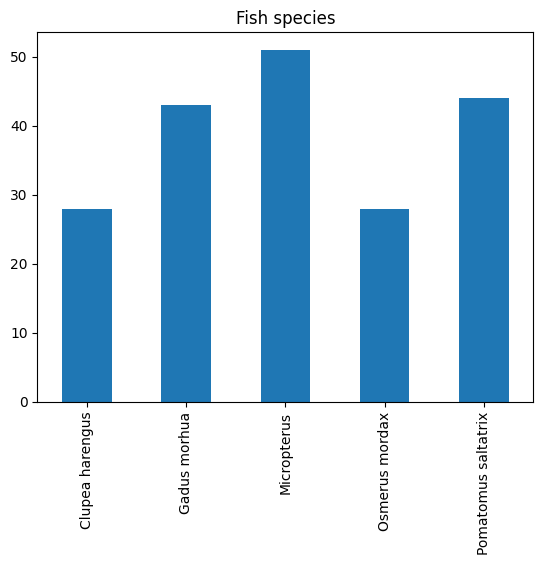

(194, 2)


In [6]:
import matplotlib.pyplot as plt
data_copy['type'].value_counts().sort_index().plot.bar()
plt.title("Fish species")
plt.show()
print(data_copy.shape)

In [7]:
data_copy['length'] = data_copy.sequence.apply(lambda x : len(x))

In [12]:
data_copy['length']

291

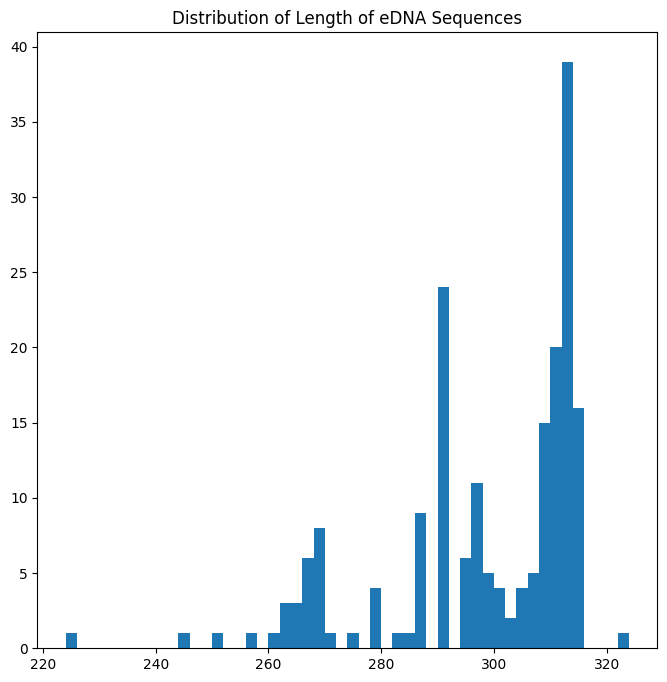

In [ ]:
plt.figure(figsize=(8,8));
plt.hist(data_copy["length"],bins=50)
plt.title("Distribution of Length of eDNA Sequences");

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))

def getKmers(sequence, size=6):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]


data['words'] = data.apply(lambda x: getKmers(x['sequence']), axis=1)
data["in_string"] = data["words"].apply(lambda x:  ' '.join(x))
X = cv.fit_transform(data["in_string"])
Y = data['type']

In [ ]:
data["in_string"]

0      CCTTTA CTTTAG TTTAGC TTAGCT TAGCTG AGCTGG GCTG...
1      CCTTTA CTTTAG TTTAGC TTAGCT TAGCTG AGCTGG GCTG...
2      CCTTTA CTTTAG TTTAGC TTAGCT TAGCTG AGCTGG GCTG...
3      CCTTAG CTTAGC TTAGCT TAGCTG AGCTGG GCTGGA CTGG...
4      CCTTTA CTTTAG TTTAGC TTAGCT TAGCTG AGCTGG GCTG...
                             ...                        
189    TTTAGC TTAGCC TAGCCG AGCCGG GCCGGA CCGGAA CGGA...
190    CCTTTA CTTTAG TTTAGC TTAGCC TAGCCG AGCCGG GCCG...
191    TTTAGC TTAGCC TAGCCG AGCCGG GCCGGA CCGGAA CGGA...
192    TTTAGC TTAGCC TAGCCG AGCCGG GCCGGA CCGGAA CGGA...
193    TTTAGC TTAGCC TAGCCG AGCCGG GCCGGA CCGGAA CGGA...
Name: in_string, Length: 194, dtype: object

In [ ]:
X.shape

(194, 2915)

In [ ]:
data["in_string"][0]

'CCTTTA CTTTAG TTTAGC TTAGCT TAGCTG AGCTGG GCTGGA CTGGAA TGGAAA GGAAAC GAAACC AAACCT AACCTA ACCTAG CCTAGC CTAGCC TAGCCC AGCCCA GCCCAT CCCATG CCATGC CATGCT ATGCTG TGCTGG GCTGGA CTGGAG TGGAGC GGAGCA GAGCAT AGCATC GCATCC CATCCG ATCCGT TCCGTC CCGTCG CGTCGA GTCGAC TCGACT CGACTT GACTTA ACTTAA CTTAAC TTAACT TAACTA AACTAT ACTATT CTATTT TATTTT ATTTTT TTTTTT TTTTTC TTTTCT TTTCTC TTCTCT TCTCTT CTCTTC TCTTCA CTTCAC TTCACC TCACCT CACCTA ACCTAG CCTAGC CTAGCA TAGCAG AGCAGG GCAGGA CAGGAA AGGAAT GGAATC GAATCT AATCTC ATCTCC TCTCCT CTCCTC TCCTCA CCTCAA CTCAAT TCAATC CAATCC AATCCT ATCCTT TCCTTG CCTTGG CTTGGA TTGGAG TGGAGC GGAGCA GAGCAA AGCAAT GCAATC CAATCA AATCAA ATCAAC TCAACT CAACTT AACTTC ACTTCA CTTCAT TTCATT TCATTA CATTAC ATTACT TTACTA TACTAC ACTACT CTACTA TACTAT ACTATT CTATTA TATTAT ATTATT TTATTA TATTAA ATTAAC TTAACA TAACAT AACATG ACATGA CATGAA ATGAAA TGAAAC GAAACC AAACCT AACCTG ACCTGC CCTGCG CTGCGG TGCGGC GCGGCT CGGCTA GGCTAT GCTATT CTATTT TATTTC ATTTCC TTTCCC TTCCCA TCCCAG CCCAGT CCAGTA CAGTAT AGTAT

In [ ]:
X[0].toarray()

array([[0, 1, 0, ..., 0, 0, 0]])

(-21.748735332489012,
 16.611698055267333,
 -14.326983308792114,
 20.97826180458069)

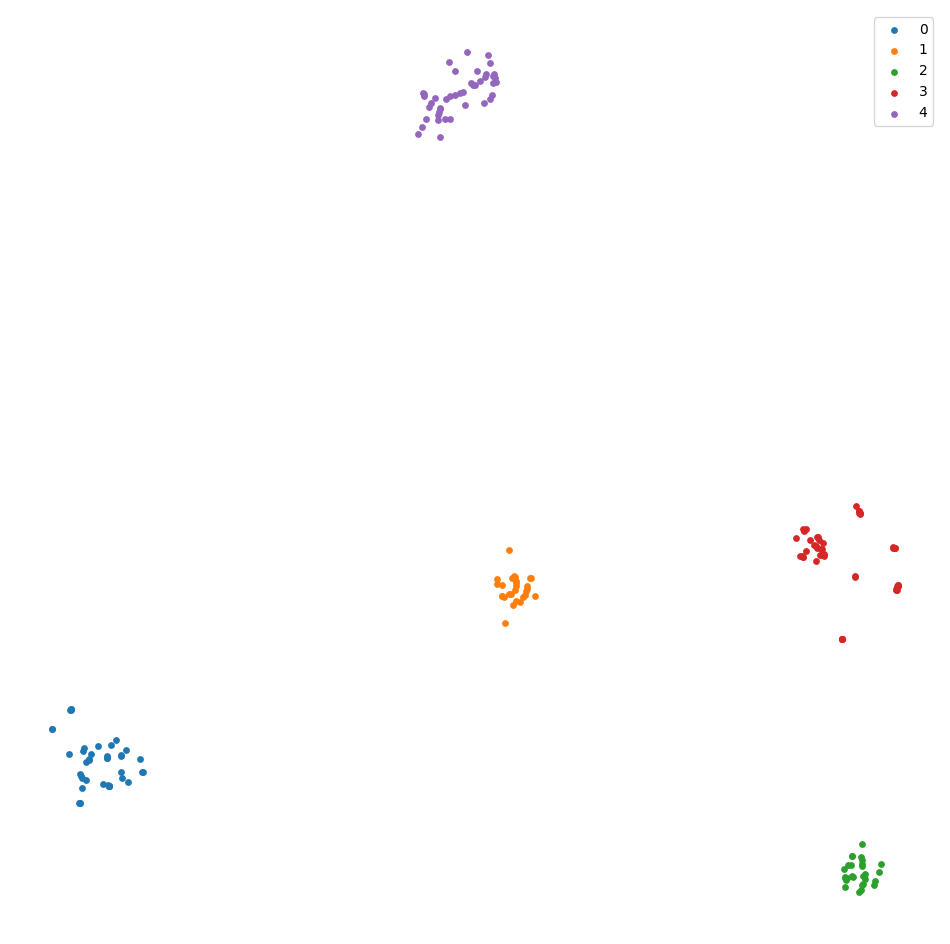

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.manifold import TSNE


color = Y
#color = [np.argmax(i) for i in color] # take one-hot Convert encoding to integer 
#color = np.stack(color, axis=0)
group = color
#cdict = {0:'black', 1: 'red', 2: 'blue', 3: 'green',}

n_neighbors = 12   # How many categories are there 

##### 2D feature plot
y = TSNE(n_components=2, learning_rate='auto',init='pca').fit_transform(X.toarray())
scatter_x = y[:, 0]
scatter_y = y[:, 1]

#cdict = {0:'black', 1: 'red', 2: 'blue', 3: 'green', 4:'brown', 5:'gray', 6:'yellow', 7:'orange', 8:'purple', 9:'cyan', 10:'pink', 11:'olive',}
fig = plt.figure(figsize=(12, 12))
for g in np.unique(group):
    ix = np.where(group == g)
    plt.scatter(scatter_x[ix], scatter_y[ix] ,label = g, s = 15)
plt.legend()
plt.axis('off')

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
99     5
100    5
101    5
102    5
103    5
Name: type, Length: 104, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint
import warnings

kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
#MultinomialNB
#print("dataset_name: ",i[1])
print("Model_name: ","MultinomialNB")
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  
  mnparams = {"alpha":[0.1,0.2,0.3,0.4]}
  #random_search = HalvingRandomSearchCV(MultinomialNB(), mnparams ,random_state=42)
  random_search = RandomizedSearchCV(estimator = MultinomialNB(), param_distributions= mnparams,
                                    n_iter =10, cv=9, n_jobs=1,scoring = 'f1_micro')
  random_search.fit(X_train, y_train)
  classifier = MultinomialNB(alpha = random_search.best_params_["alpha"])
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print(all_accs)
print("\n")
print("-----------------------------------------------")

Model_name:  MultinomialNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  9]]
[1.0, 1.0, 1.0, 1.0, 1.0]


-----------------------------------------------


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings



kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
svcparams = {'C': [0.1,1,2],'kernel': ['rbf', 'poly', 'sigmoid']} #find best parameters 
#svcparams = {'C': [0.1,1,2], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']} #find best parameters 
random_search = RandomizedSearchCV(estimator = svm.SVC(), param_distributions= svcparams,
                                n_iter =10, cv=9, n_jobs=-1,scoring = 'accuracy')
random_search.fit(X, Y)
#SVM
#print("dataset_name: ",i[1])
print("Model_name: ","SVM")
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  classifier = svm.SVC(kernel= random_search.best_params_["kernel"], 
                        C = random_search.best_params_["C"], 
                        random_state = 42)
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  print(f"Fold {i}:")
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    #target_names = y_pred[:-1].unique().tolist()
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print(all_accs)
print("\n")
print("-----------------------------------------------")

Model_name:  SVM
Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  9]]
[1.0, 1.0, 1.0, 1.0, 1.0]


-----------------------------------------------


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings

warnings.filterwarnings('ignore') 

kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
#print("dataset_name: ",i[1])
#DecisionTreeClassifier
print("Model_name: ","DecisionTreeClassifier")
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  DSparams={
"max_depth" : [2,4,6,8,10,12,14],
"criterion" : ['gini','entropy'],
"min_samples_split" : range(2,10),
"min_samples_leaf" : range(2,10),
  }
  random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions=DSparams,
                                  n_iter =10, cv=9, n_jobs=1,scoring = 'f1_micro')
  random_search.fit(X_train, y_train)
  classifier = DecisionTreeClassifier(min_samples_split= random_search.best_params_["min_samples_split"]
                                      ,min_samples_leaf = random_search.best_params_["min_samples_leaf"],
                                      max_depth =  random_search.best_params_["max_depth"], 
                                      criterion = random_search.best_params_["criterion"])
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  print(f"Fold {i}:")
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    print(y_pred)
    #target_names = y_pred[:-1].unique().tolist()
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print(all_accs)
print("\n")
print("-----------------------------------------------")

Model_name:  DecisionTreeClassifier
Fold 0:
[0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4]
Fold 1:
Fold 2:
Fold 3:
Fold 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  9]]
[1.0, 1.0, 0.9703703703703704, 0.9332467532467532, 0.9076923076923077]


-----------------------------------------------


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings

warnings.filterwarnings('ignore')  

rfparams={
  'n_estimators': [200, 500],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth' : [4,5,6,7,8],
  'criterion' :['gini', 'entropy']
  }
rfc=RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator = rfc, param_distributions=rfparams,
                                  n_iter =10, cv=9, n_jobs=-1)
random_search.fit(X, Y)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
#print("dataset_name: ",i[1])
#RandomForestClassifier
max_acc = 0
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  
  classifier = RandomForestClassifier(random_state = 42,
                                      n_estimators= random_search.best_params_["n_estimators"],
                                      max_features= random_search.best_params_["max_features"],
                                      max_depth= random_search.best_params_["max_depth"],
                                      criterion= random_search.best_params_["criterion"])
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  print(f"Fold {i}:")
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    print(y_pred)
    #target_names = y_pred[:-1].unique().tolist()
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print(all_accs)
print("\n")
print("-----------------------------------------------")

Fold 0:
[0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4]
Fold 1:
Fold 2:
Fold 3:
Fold 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  9]]
[1.0, 1.0, 1.0, 1.0, 1.0]


-----------------------------------------------
